In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [2]:
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [10]:
df = raw_dataset.copy()

train = df.sample(frac=0.8)
test = df.drop(train.index)

x = np.array(train['Weight'])
y = np.array(train['MPG'])

xval = np.array(test['Weight'])
yval = np.array(test['MPG'])

print(x[:5])

[3060. 3907. 4376. 2130. 4100.]


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

print(tf.__version__)

2.8.0


In [11]:
print(len(x), len(xval))

318 80


In [18]:
normalize_weight = layers.Normalization(input_shape=[1,], axis=None)
normalize_weight.adapt(x)

model = keras.Sequential(
    [
     normalize_weight,
     layers.Dense(units=1)
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [29]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

model.fit(x, y, epochs = 100, verbose=0, validation_split=0.2)

In [30]:
model.evaluate(
    xval,
    yval, verbose=0)

3.3025245666503906

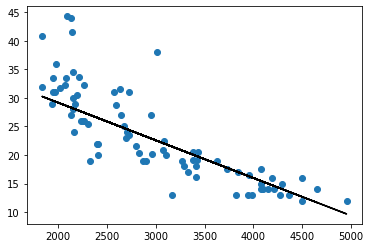

In [36]:
y_pred = model.predict(xval)

plt.scatter(xval, yval)
plt.plot(xval, y_pred, color='black')